In [1]:
import os
import numpy as np
import pandas as pd
import time

In [2]:
import opsimsummary as oss

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
datadir = os.path.join(oss.__path__[0], 'example_data')
opsimdb = os.path.join(datadir, 'enigma_1189_micro.db')

In [4]:
import snsims
import healpy as hp

In [5]:
zdist = snsims.PowerLawRates(rng=np.random.RandomState(1), fieldArea=hp.nside2pixarea(nside=4, degrees=True), 
                            zbinEdges = np.arange(0.0001, 1.1, 0.1))

In [6]:
oss.__VERSION__

'0.2.0'

In [7]:
print snsims.__file__

/Users/rbiswas/.local/lib/python2.7/site-packages/snsims/__init__.pyc


In [8]:
print (snsims.__VERSION__)

0.2.1


In [17]:
# opsimdb = os.path.join('/Users/rbiswas/data/LSST/OpSimData/minion_1016_sqlite.db')

TypeError: join() got an unexpected keyword argument 'subset'

In [9]:
# opsimOut = oss.OpSimOutput.fromOpSimDB(opsimdb, subset='_all')

In [ ]:
# opsimOut.writeOpSimHDF()

In [11]:
# opsimOut = oss.OpSimOutput.fromOpSimDB(opsimdb)

 reading from database sqlite:////Users/rbiswas/data/LSST/OpSimData/minion_1016_sqlite.db
SELECT * FROM Summary WHERE PROPID in (56, 54)


In [15]:
!ls /Users/rbiswas/data/LSST/OpSimData/minion_1016.hdf

ls: /Users/rbiswas/data/LSST/OpSimData/minion_1016.hdf: No such file or directory


In [19]:
# opsimOut.writeOpSimHDF('/Users/rbiswas/data/LSST/OpSimData/minion_1016.hdf')

/usr/local/software/lib/python2.7/site-packages/pandas/io/pytables.py:260: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->unicode,key->axis0] [items->None]

  f(store)
/usr/local/software/lib/python2.7/site-packages/pandas/io/pytables.py:260: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->unicode,key->block0_items] [items->None]

  f(store)
/usr/local/software/lib/python2.7/site-packages/pandas/io/pytables.py:260: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->unicode,key->block1_items] [items->None]

  f(store)
/usr/local/software/lib/python2.7/site-packages/pandas/core/generic.py:1101: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-type

In [10]:
opsimOut = oss.OpSimOutput.fromOpSimHDF('/Users/rbiswas/data/LSST/OpSimData/minion_1016.hdf', subset='combined')

read in proposal
read in proposal
combined {u'conf/survey/northeclipticspur-18c.conf': 55, u'conf/survey/galacticplaneprop.conf': 52, 'ddf': 56, 'wfd': 54, u'conf/survey/southcelestialpole-18.conf': 53}
propIDs [56, 54] <type 'list'> <type 'numpy.int64'>
summarydf cols Index([        u'obsHistID',         u'sessionID',            u'propID',
                 u'fieldID',           u'fieldRA',          u'fieldDec',
                  u'filter',           u'expDate',            u'expMJD',
                   u'night',         u'visitTime',      u'visitExpTime',
                 u'finRank',           u'FWHMeff',          u'FWHMgeom',
            u'transparency',           u'airmass',        u'vSkyBright',
       u'filtSkyBrightness',         u'rotSkyPos',         u'rotTelPos',
                     u'lst',          u'altitude',           u'azimuth',
               u'dist2Moon',        u'solarElong',            u'moonRA',
                 u'moonDec',           u'moonAlt',            u'moonAZ',


/usr/local/software/lib/python2.7/site-packages/pandas/util/decorators.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return func(*args, **kwargs)


In [11]:
NSIDE = 256

In [12]:
simTile = snsims.SimulationTile(snsims.SimpleSALTDist,
                                NSIDE=NSIDE,
                                tileID=2,
                                hpOpSim='/Users/rbiswas/data/LSST/OpSimData/healpixelized_MINION_1016_256.db',
                                rate=snsims.PowerLawRates,
                                allPointings=opsimOut)

In [13]:
tstart = time.time()

In [14]:
simTile.writeTile(fileName='SimTile-2.hdf')

another 50 2097152


/Users/rbiswas/.local/lib/python2.7/site-packages/snsims/simulations.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['snid'] = snid
/Users/rbiswas/.local/lib/python2.7/site-packages/snsims/simulations.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['flux'] = fluxes
/Users/rbiswas/.local/lib/python2.7/site-packages/snsims/simulations.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

another 50 2097202
another 50 2097252
another 50 2097302
another 50 2097352
another 50 2097402


In [18]:
tend = time.time()

In [19]:
print(tend - tstart)

125.169522047


In [20]:
len(simTile.snParamTable)

282

In [21]:
df = pd.read_hdf('SimTile-2.hdf')

In [23]:
df.fieldID.unique()

array([2736, 2626, 2614, 2498, 2742])

In [38]:
df['SNR'] = df.flux / df.fluxerrs

In [51]:
totalCounts, edges = np.histogram(simTile.snParamTable.ix[df.query('SNR > 0').snid.unique()].z, bins=np.arange(0., 1.4, 0.1))
fiveSigmaCounts, edges = np.histogram(simTile.snParamTable.ix[df.query('SNR > 5').snid.unique()].z, bins=np.arange(0., 1.4, 0.1))

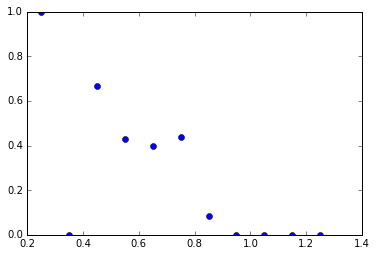

In [65]:
fig, ax = plt.subplots()
ax.plot(0.5 * (edges[: -1] + edges[1:] ), fiveSigmaCounts / totalCounts.astype(np.float), 'o')

## Scratch

In [56]:
#/ np.float(totalCounts)

array([0, 0, 1, 0, 4, 3, 6, 7, 2, 0, 0, 0, 0])

In [34]:
df.snid.unique().size * 200 /10000

5

In [29]:
df.expMJD.max() - df.expMJD.min()

3388.7746629999965

In [347]:
class SimulationTile(snsims.Universe):
    def __init__(self, paramDist, rate, NSIDE, tileID, hpOpSim, allPointings=None, timeRange=None):
        self._randomState = None
        self.Tiling = snsims.HealpixTiles(nside=NSIDE, preComputedMap=hpOpSim)
        self.tileID = tileID
        self.fieldArea = self.Tiling.area(tileID)
        self.zdist = rate(rng=self.randomState, fieldArea=self.fieldArea)
        self.zsamples = self.zdist.zSamples
        self.numSN = len(self.zsamples)
        self.positions = self.Tiling.positions(self.tileID, self.numSN, rng=self.randomState)
        self._snParamTable = None
        self.columns = ('expMJD', 'filter', 'fieldID', 'fiveSigmaDepth')
        self.tilePointings = self.Tiling.pointingSequenceForTile(self.tileID, 
                                                                 allPointings=allPointings, columns=self.columns)
        self._timeRange = timeRange
        self.bandPasses = BandpassDict.loadTotalBandpassesFromFiles()
        
    @property
    def minPeakTime(self):
        if  self._timeRange is None:
            minTime = self.tilePointings.expMJD.min()
        else:
            minTime = self._timeRange[0]
        return minTime
    
    @property
    def maxPeakTime(self):
        if  self._timeRange is None:
            maxTime = self.tilePointings.expMJD.max()
        else:
            maxTime = self._timeRange[1]
        return maxTime
    
    @property
    def snParamTable(self):
        if self._snParamTable is None:
            self.snParams()
        return self._snParamTable
    @property
    def randomState(self):
        if self._randomState is None:
            self._randomState = np.random.RandomState(self.tileID)
        return self._randomState
    def snParams(self):
        zsamples = self.zdist.zSamples
        numSN = len(zsamples)
        positions = self.Tiling.positions(self.tileID, numSN, rng=self.randomState)
        ra = self.positions[0]
        dec = - self.positions[1] + 45.0 
        # Why do we need numSN
        sp = snsims.SimpleSALTDist(numSN=numSN, rng=self.randomState, zSamples=self.zsamples).paramSamples
        sp['ra'] = self.positions[0]
        sp['dec'] = self.positions[1]
        sp['snid'] = np.left_shift(self.tileID, 20) + np.arange(numSN)
        sp.set_index('snid', inplace=True)
        self._snParamTable = sp
        
        if self.minPeakTime is None or self.maxPeakTime is None:
            pass
        else:
            sp['t0'] = self.minPeakTime + (self.maxPeakTime - self.minPeakTime) * sp['t0']
        return sp
    
    @staticmethod
    def getSNCosmoParamDict(odict, SNCosmoModel):
        mydict = dict()
        param_names = SNCosmoModel.param_names
        for param in odict.index.values:
            if param in param_names:
                mydict[param] = odict[param]
        return mydict
                
    def SN(self, snid, timeRange='model'):
        mySNParams = self.snParamTable.ix[snid]
        sn = SNObject(ra=mySNParams.ra, dec=mySNParams.dec)
        #print mySNParams
        sncosmo_params = self.getSNCosmoParamDict(mySNParams, sn)
        #print(sncosmo_params)
        sn.set(**sncosmo_params)
        z = sn.get('z')
        t0 = sn.get('t0')
        lcMinTime = t0 - 20. * (1.0 + z)
        lcMaxTime = t0 + 50. * (1.0 + z )
        df = self.tilePointings.query('expMJD < @lcMaxTime and expMJD > @lcMinTime')
        df['snid'] = snid
        fluxes = []
        fluxerrs = []
        for rows in df.iterrows():
            row = rows[1]
            # print(row['expMJD'], row['filter'], row['fiveSigmaDepth'])
            bp = self.bandPasses[row['filter']]
            flux = sn.catsimBandFlux(bandpassobject=bp, time=row['expMJD'])
            fluxerr = sn.catsimBandFluxError(time=row['expMJD'], bandpassobject=bp, fluxinMaggies=flux,
                                             m5=row['fiveSigmaDepth'])
            fluxes.append(flux)
            fluxerrs.append(fluxerr)
        df['flux'] = fluxes
        df['fluxerrs'] = fluxerrs
        return sn, df
    def writeTile(self, fileName, timeRange='model'):
        count = 0
        for snid in self.snParamTable.index.values:
            self.writeSN(snid, fileName, timeRange=timeRange)
            if count % 50 == 0:
                print('another 50', snid)
            count += 1
    def writeSN(self, snid, fileName, timeRange='model'):
        sn, df = self.SN(snid, timeRange)
        df['filter'] = df['filter'].astype(str)
        with pd.get_store(fileName) as store:
        # with pd.HDFStore(fileName, mode='a') as hdf:
        #    hdf.append(df, format='table')
             store.append('tile_{}'.format(self.tileID), df)
        #df.to_hdf(fileName, key='tile_{}'.format(self.tileID), mode='a', format='t')

In [10]:
hpOpSim = oss.HealPixelizedOpSim.fromOpSimDB(opsimdb, NSIDE=256)

 reading from database sqlite:////Users/rbiswas/.local/lib/python2.7/site-packages/opsimsummary/example_data/enigma_1189_micro.db
SELECT * FROM Summary WHERE PROPID in (366, 364)


In [11]:
hpTiles = snsims.HealpixTiles(nside=16, healpixelizedOpSim=hpOpSim)

In [12]:
hpTiles.positions(2, 100, rng=np.random.RandomState(2))

(array([ 40.78438026,  40.53065749,  42.29979016,  42.23088482,
         42.04748867,  42.23080733,  41.25210975,  41.58830994,
         41.08216056,  43.02952082,  41.00179235,  41.70250909,
         42.22058337,  40.72819844,  44.64701905,  42.87129852,
         42.16330051,  40.95422055,  42.60908388,  41.49905649,
         43.52293982,  42.23783771,  40.91914043,  39.77683503,
         40.93875362,  42.7592876 ,  41.65064611,  43.23235613,
         41.48024909,  43.36557202,  41.2016626 ,  40.19841896,
         42.4880581 ,  41.60520257,  42.00338112,  42.67501915,
         41.15691278,  40.75339679,  40.76006139,  40.25751167,
         42.9898204 ,  40.24773312,  42.2821802 ,  42.45909195,
         44.23997366,  41.13242615,  41.25275956,  43.02907919,
         42.94733378,  44.4284698 ,  43.54080231,  42.62398676,
         41.5606913 ,  41.55608179,  40.58244776,  41.74328026,
         41.97500502,  40.45460385,  40.6112282 ,  42.84786018,
         41.22512085,  42.88364646,  41.

In [11]:
mapvalues = np.ones(hp.nside2npix(256)) * hp.UNSEEN

NameError: name 'hp' is not defined

In [12]:
mapvalues[100] = 100

NameError: name 'mapvalues' is not defined

In [158]:
r, t = hp.pix2ang(nside=256, ipix=100, nest=True)

In [159]:
np.degrees(r)

87.761314039157497

In [160]:
np.degrees(t)

46.054687499999993

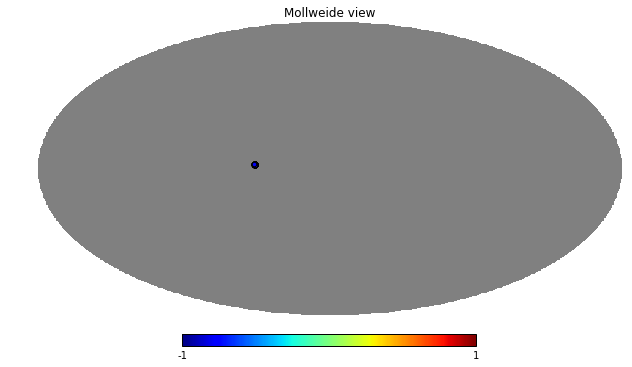

In [161]:
hp.mollview(mapvalues)
hp.projscatter(r, t)
hp.projscatter(theta, phi)

In [84]:
phi, theta = hpTiles.positions(100, 100)
phi = np.radians(phi)
theta = np.radians(theta)

In [ ]:
hp

In [34]:
hpTiles.area(tileID=23)/ 41252.96

1.271565793719964e-06

In [35]:
hpTiles.positions()

TypeError: positions() takes at least 3 arguments (1 given)

In [16]:
import healpy as hp

In [18]:
zdist.zSamples

array([ 0.00860442,  0.00400548,  0.01708304, ...,  0.95772653,
        0.91247313,  0.98569087])

In [19]:
zdist.numSN()

array([   443,   3220,   9038,  17877,  29362,  43063,  59049,  76234,
        95144, 115460])

In [20]:
zdist.zbinEdges

array([  1.00000000e-04,   1.00100000e-01,   2.00100000e-01,
         3.00100000e-01,   4.00100000e-01,   5.00100000e-01,
         6.00100000e-01,   7.00100000e-01,   8.00100000e-01,
         9.00100000e-01,   1.00010000e+00])

In [22]:
zdist.zSampleSize()

array([    447.65671761,    3288.5656771 ,    9134.03591601,
         17916.69513074,   29401.70134609,   43256.16515423,
         59105.79756238,   76575.27375973,   95313.48794103,
        115006.94175052])

In [25]:
from future.builtins import range

In [26]:
sd = snsims.SimpleSALTDist(rng=np.random.RandomState(43), numSN=3, zSamples=[0.03, 0.2, 0.5])

In [27]:
sd.numSN

3

In [28]:
sd = snsims.SimpleSALTDist(3, zSamples=[0.2, 0.5, 0.7], rng=np.random.RandomState(2))

In [29]:
sd.paramSamples

,M,Mabs,c,mB,t0,x0,x1,z
0,0.681387,-18.507682,-0.195380,21.516975,0.435995,0.000039,-0.617223,0.2
1,0.663392,-18.850143,-0.158688,23.475538,0.025926,0.000006,-1.501007,0.5
2,0.239084,-19.227525,-0.107446,23.981698,0.549662,0.000004,0.893590,0.7


In [106]:
hp.nside2npix(256)

786432

In [112]:
np.binary_repr(hp.nside2npix(256))

'11000000000000000000'

In [113]:
np.binary_repr(1000)

'1111101000'

In [116]:
np.binary_repr(x)

'111110100000000000110000000000'

In [115]:
x = hp.nside2npix(16) + np.left_shift(1000, 20)

In [105]:
hp.nside2npix(256)

824633720832

In [103]:
np.log2(hp.nside2npix(256))

19.584962500721158

In [12]:
from lsst.sims.catUtils.supernovae import SNObject

In [32]:
NSIDE=256
tileSim = snsims.HealpixTiles(nside=NSIDE, healpixelizedOpSim=hpOpSim)

In [33]:
tileSim.positions(2, 5, rng=np.random.RandomState(2))

(array([ 44.79113638,  44.84988784,  44.79078878,  44.83928145,  44.89679089]),
 array([ 0.3861089 ,  0.23676652,  0.40196668,  0.29139572,  0.30716451]))

In [ ]:
SNObject(ra = sn)

In [ ]:

from lsst.sims.photUtils import BandpassDict

In [348]:
NSIDE=256

In [349]:
opsimout = oss.OpSimOutput.fromOpSimDB(opsimdb)

 reading from database sqlite:////Users/rbiswas/.local/lib/python2.7/site-packages/opsimsummary/example_data/enigma_1189_micro.db
SELECT * FROM Summary WHERE PROPID in (366, 364)


In [350]:
!rm simulatedTile-2.hdf

rm: simulatedTile-2.hdf: No such file or directory


In [351]:
import time
tstart = time.time()

In [353]:
ss = simTile.snParamTable

In [354]:
ss.tail()

,M,Mabs,c,mB,t0,x0,x1,z,ra,dec
snid,,,,,,,,,,
2097429,0.084355,-19.003140,-0.012830,25.989778,49587.534368,6.373471e-07,-0.400639,1.364771,44.720561,0.292130
2097430,-0.084751,-19.226817,0.084354,25.706809,49575.245355,8.304062e-07,-1.637463,1.334876,44.813034,0.315281
2097431,0.250335,-19.460537,-0.040465,25.591896,49578.543855,9.217440e-07,-1.120686,1.395461,44.869924,0.273011
2097432,-0.377360,-19.669900,0.090366,25.282814,49590.864107,1.216124e-06,0.850998,1.344427,44.810630,0.182443
2097433,0.495625,-19.064607,-0.125411,25.923843,49576.042725,6.780369e-07,-0.925769,1.362495,44.687604,0.285268


In [355]:
simTile.writeTile(fileName='simulatedTile-2.hdf')

('another 50', 2097152)
('another 50', 2097202)
('another 50', 2097252)
('another 50', 2097302)
('another 50', 2097352)
('another 50', 2097402)


In [ ]:
# simTile.writeSN(snid=2097152, fileName='simulatedTile-2.hdf')

In [356]:
pd.read_hdf('simulatedTile-2.hdf')

,expMJD,filter,fieldID,fiveSigmaDepth,snid,flux,fluxerrs
obsHistID,,,,,,,
172349,49571.063219,g,2437,24.459918,2097152,1.728647e-11,3.252719e-11
172350,49571.063666,g,2453,24.513292,2097152,1.729167e-11,3.095152e-11
172351,49571.064115,g,2557,24.445066,2097152,1.729689e-11,3.297966e-11
172352,49571.064563,g,2679,24.430031,2097152,1.730210e-11,3.344406e-11
175206,49573.964751,z,2707,22.206644,2097152,2.743777e-10,2.613294e-10
175207,49573.965200,z,2593,22.222713,2097152,2.744513e-10,2.574825e-10
175213,49573.967886,z,2579,22.222465,2097152,2.748916e-10,2.575418e-10
175214,49573.968334,z,2703,22.177684,2097152,2.749650e-10,2.684084e-10
175215,49573.968797,z,2687,22.176571,2097152,2.750410e-10,2.686843e-10


In [276]:
sn, lc = simTile.SN(2097152)

In [357]:
tend = time.time()

In [358]:
tend - tstart

60.5964150428772

In [279]:
len(simTile.snParamTable)

282

In [359]:
data = pd.read_hdf('simulatedTile-2.hdf', 'tile_2')

In [361]:
len(data.snid.unique())

282

In [362]:
len(data)

13536

In [171]:
glc

,expMJD,filter,fieldID,fiveSigmaDepth,snid,flux,fluxerrs
obsHistID,,,,,,,
172349,49571.063219,g,2437,24.459918,2097152,1.728647e-11,3.252719e-11
172350,49571.063666,g,2453,24.513292,2097152,1.729167e-11,3.095152e-11
172351,49571.064115,g,2557,24.445066,2097152,1.729689e-11,3.297966e-11
172352,49571.064563,g,2679,24.430031,2097152,1.730210e-11,3.344406e-11
190986,49593.024216,g,2707,24.425194,2097152,5.252354e-09,4.441515e-11
190987,49593.024665,g,2593,24.436324,2097152,5.252289e-09,4.415396e-11


In [177]:
glc.fluxerrs

obsHistID
172349    3.252719e-11
172350    3.095152e-11
172351    3.297966e-11
172352    3.344406e-11
190986    4.441515e-11
190987    4.415396e-11
Name: fluxerrs, dtype: float64

12


<Container object of 3 artists>

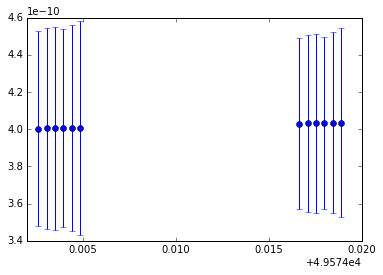

In [181]:
fig, ax = plt.subplots()
glc = lc.query('filter == "i"')
print(len(glc))
ax.errorbar(glc.expMJD, glc.flux, yerr=glc.fluxerrs.values, fmt='o')

In [142]:
mySN = SNObject(ra=44.78, dec=0.28)

In [153]:
simTile.snParamTable.ix[2097152]

array(['M', 'Mabs', 'c', 'mB', 't0', 'x0', 'x1', 'z', 'ra', 'dec'], dtype=object)

In [150]:
for param in simTile.snParamTable.ix[2097152]:
    print param

0.442291547071
-18.9929233772
-0.150324608986
20.4551153582
49591.2215108
0.000103922920062
0.270252046785
0.157302415606
44.7801132604
0.283009138837


In [149]:
mySN.param_names

['z', 't0', 'x0', 'x1', 'c', 'hostebv', 'hostr_v', 'mwebv', 'mwr_v']

In [147]:
simTile.getSNCosmoParamDict(simTile.snParamTable.ix[2097152], mySN)

{}

In [116]:
ht = snsims.HealpixTiles(nside=256, 
                         preComputedMap='/Users/rbiswas/.local/lib/python2.7/site-packages/opsimsummary/example_data/healpixels_micro.db')

In [33]:
subset = ht.pointingSequenceForTile(allPointings=opsimOut, columns=('expMJD', 'filter', 'fiveSigmaDepth'), tileID=2)

In [39]:
subset.head()

,expMJD,filter,fiveSigmaDepth
obsHistID,,,
172349,49571.063219,g,24.459918
172350,49571.063666,g,24.513292
172351,49571.064115,g,24.445066
172352,49571.064563,g,24.430031
175206,49573.964751,z,22.206644


In [46]:
row = next(subset.iterrows())
    

In [56]:
for rows in subset.head().iterrows():
    row = rows[1]
    print(row['expMJD'], row['filter'], row['fiveSigmaDepth'])

(49571.063219, u'g', 24.459918)
(49571.063666, u'g', 24.513292)
(49571.064115, u'g', 24.445066)
(49571.064563, u'g', 24.430031)
(49573.964751, u'z', 22.206644)


In [52]:
row[1]['expMJD']

49571.063219

In [18]:
opsimdb

'/Users/rbiswas/.local/lib/python2.7/site-packages/opsimsummary/example_data/enigma_1189_micro.db'

In [ ]:
hpopSim = oss.HealPixelizedOpSim

In [77]:
from lsst.sims.photUtils import BandpassDict

In [76]:
opsimOut

In [119]:
ss.head()

,M,Mabs,c,mB,t0,x0,x1,z,ra,dec
snid,,,,,,,,,,
2097152,-0.172234,-19.193721,0.073487,16.966703,49583.315239,0.002592,-0.531945,0.037492,40.874748,3.657655
2097153,0.056920,-19.187167,-0.023738,18.271408,49589.279658,0.000778,0.160154,0.066762,41.139171,4.183124
2097154,0.402092,-18.867247,-0.087259,17.328732,49576.979866,0.001861,-1.164548,0.038095,43.627595,4.123643
2097155,-0.099114,-19.539191,0.025303,12.497307,49582.614289,0.158649,0.178738,0.005747,44.264664,4.600741
2097156,-0.009494,-19.393026,0.026732,15.923752,49588.676135,0.006780,-0.676756,0.025644,44.037583,4.858994


In [102]:
from lsst.sims.catUtils.supernovae import SNObject

In [123]:
sn, df = simTile.SN(2097152)

In [128]:
sn.SNstate

{'MWE(B-V)': 0.08050362765789032,
 'ModelSource': 'salt2-extended',
 '_dec': 0.0049394412859329953,
 '_ra': 0.78156041581027214,
 'c': 0.0,
 'hostebv': 0.0,
 'hostr_v': 3.1000000000000001,
 'mwebv': 0.0,
 'mwr_v': 3.1000000000000001,
 't0': 0.0,
 'x0': 1.0,
 'x1': 0.0,
 'z': 0.0}

In [104]:
simTile.tilePointings.head()

,expMJD,filter,fieldID,fiveSigmaDepth
obsHistID,,,,
172349,49571.063219,g,2437,24.459918
172350,49571.063666,g,2453,24.513292
172351,49571.064115,g,2557,24.445066
172352,49571.064563,g,2679,24.430031
175206,49573.964751,z,2707,22.206644


In [ ]:
simTile.tilePointings

In [28]:
opsimout.summary.ix[pointings].fieldID.unique()

NameError: name 'pointings' is not defined

In [69]:
opsimout.summary.ix[pointings][['fieldRA', 'fieldDec', 'fieldID', 'fiveSigmaDepth', 'expMJD', 'filter']]

,fieldRA,fieldDec,fieldID,fiveSigmaDepth,expMJD,filter
obsHistID,,,,,,
187059,0.792429,0.034090,2736,21.341876,49585.394674,y
187073,0.792429,0.034090,2736,21.393171,49585.401121,y
194374,0.792429,0.034090,2736,23.583906,49596.316600,i
194421,0.792429,0.034090,2736,23.552233,49596.338125,i
195238,0.792429,0.034090,2736,24.757496,49597.273542,g
195240,0.766063,-0.007846,2626,24.823001,49597.274437,g
195308,0.792429,0.034090,2736,25.102092,49597.307155,g
195309,0.766063,-0.007846,2626,25.147792,49597.307604,g
196190,0.766063,-0.007846,2626,24.379822,49598.283632,g


In [59]:
pointings = simTile.Tiling.pointingSequenceForTile(2, allPointings=None)

In [39]:
ss.head()

,M,Mabs,c,mB,t0,x0,x1,z,ra,dec
snid,,,,,,,,,,
2097152,-0.172234,-19.193721,0.073487,16.966703,0.557888,0.002592,-0.531945,0.037492,40.874748,3.657655
2097153,0.056920,-19.187167,-0.023738,18.271408,0.829474,0.000778,0.160154,0.066762,41.139171,4.183124
2097154,0.402092,-18.867247,-0.087259,17.328732,0.269411,0.001861,-1.164548,0.038095,43.627595,4.123643
2097155,-0.099114,-19.539191,0.025303,12.497307,0.525970,0.158649,0.178738,0.005747,44.264664,4.600741
2097156,-0.009494,-19.393026,0.026732,15.923752,0.801993,0.006780,-0.676756,0.025644,44.037583,4.858994


In [40]:
snObj = SNObject(ra=ss.ix[2097152].ra, dec=ss.ix[2097152].dec)

In [42]:
snObj.set(ss.ix[209])

source:
  class      : SALT2Source
  name       : 'salt2-extended'
  version    : 1.0
  phases     : [-20, .., 50] days
  wavelengths: [300, .., 18000] Angstroms
effect (name='host' frame='rest'):
  class           : OD94Dust
  wavelength range: [909.09, 33333.3] Angstroms
effect (name='mw' frame='obs'):
  class           : OD94Dust
  wavelength range: [909.09, 33333.3] Angstroms
parameters:
  z       = 0.0
  t0      = 0.0
  x0      = 1.0
  x1      = 0.0
  c       = 0.0
  hostebv = 0.0
  hostr_v = 3.1000000000000001
  mwebv   = 0.0
  mwr_v   = 3.1000000000000001


In [53]:
mydict = dict()
for key in ss.ix[2097152].index.values:
    if key in snObj.param_names:
        mydict[key] = ss.ix[2097152][key]

In [52]:
ss.ix[2097152].index.values

array(['M', 'Mabs', 'c', 'mB', 't0', 'x0', 'x1', 'z', 'ra', 'dec'], dtype=object)

In [54]:
mydict

{'c': 0.073486538283977915,
 't0': 0.55788769050580311,
 'x0': 0.0025923933113910268,
 'x1': -0.53194513206142791,
 'z': 0.037492301877033854}

In [55]:
snObj.set(**mydict)

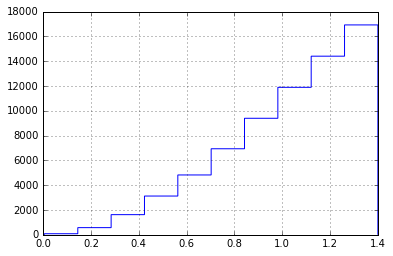

In [42]:
ss.z.hist(histtype='step')

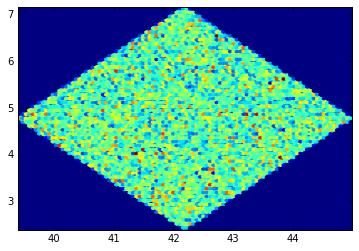

In [43]:
plt.hexbin(ss.ra, ss.dec)

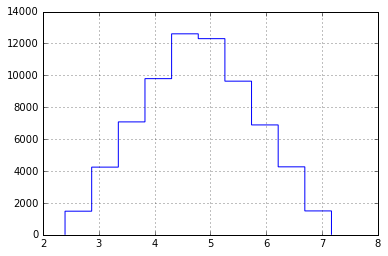

In [31]:
ss.dec.hist(histtype='step')

In [128]:
ss.ra.ix[0]

AttributeError: 'DataFrame' object has no attribute 'ra'

In [119]:
sp.paramSamples

,M,Mabs,c,mB,t0,x0,x1,z
0,-0.277888,-19.383193,0.080845,16.777230,0.192640,3.078120e-03,0.218513,0.037492
1,-0.351036,-19.781365,0.105987,17.677211,0.917166,1.343638e-03,0.165804,0.066762
2,0.247270,-19.015754,-0.099019,17.180225,0.015636,2.120422e-03,0.578635,0.038095
3,-0.190211,-19.750369,0.123533,12.286130,0.042574,1.939202e-01,-1.797110,0.005747
4,0.158791,-19.220540,-0.067292,16.096238,0.245332,5.758305e-03,0.477328,0.025644
5,-0.288393,-19.472536,0.057160,17.727202,0.782295,1.279627e-03,0.990104,0.059560
6,0.006882,-19.441654,0.035016,16.104269,0.047289,5.748751e-03,-1.062122,0.028439
7,0.320966,-19.137254,-0.086276,18.490193,0.223354,6.370129e-04,-0.455084,0.071904
8,-0.437145,-19.731452,0.222073,18.340214,0.333372,7.346587e-04,-2.365134,0.087302
9,0.359724,-18.642377,-0.090541,19.072094,0.734712,3.730201e-04,-0.685680,0.074700


In [115]:
simTile.numSN

69802

In [96]:
simTile.snParams

<bound method SimulationTile.snParams of <__main__.SimulationTile object at 0x11592a750>>

In [91]:
simTile.zsamples.max()

1.3999920837791637

(array([   13.,    74.,   205.,   373.,   637.,   988.,  1379.,  1747.,
         2221.,  2605.,  3178.,  3761.,  4372.,  5025.,  5603.,  6290.,
         6771.,  7634.,  8157.,  8769.]),
 array([ 0.00574665,  0.07545893,  0.1451712 ,  0.21488347,  0.28459574,
         0.35430801,  0.42402028,  0.49373255,  0.56344483,  0.6331571 ,
         0.70286937,  0.77258164,  0.84229391,  0.91200618,  0.98171846,
         1.05143073,  1.121143  ,  1.19085527,  1.26056754,  1.33027981,
         1.39999208]),
 <a list of 1 Patch objects>)

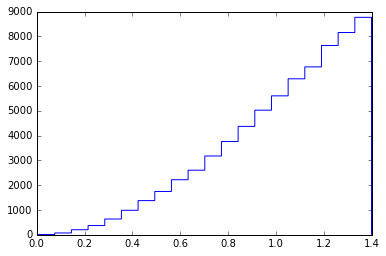

In [93]:
plt.hist(simTile.zsamples, bins=20, histtype='step')

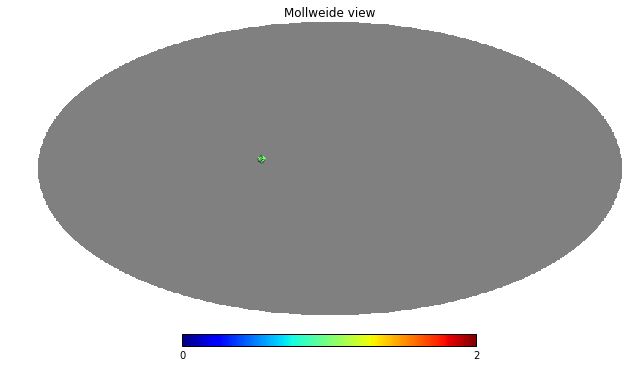

In [75]:
mapvals = np.ones(hp.nside2npix(NSIDE))* hp.UNSEEN
mapvals[2] =1
hp.mollview(mapvals, nest=True)
hp.projscatter(np.radians(simTile.positions[1][:50]), np.radians(simTile.positions[0][:50]), **dict(s=0.01))

In [7]:
class TestUniverse(snsims.Universe()):
    pass

TypeError: Can't instantiate abstract class Universe with abstract methods SN, randomState, snParams

In [ ]:
zdist = snsims.PowerLawRates(rng=np.random.)

In [8]:
np.pi * 4 * np.degrees(1.)**2

41252.961249419277

In [9]:
1.0/ 12.0/ 256**2

1.2715657552083333e-06

In [10]:
rng = np.random.RandomState()

In [11]:
hpTiles.nside

256

In [16]:
p, t = hpTiles.positions(23, 20, rng)

('MT19937', array([3073425384,  721572093,  324176003,   39267041, 3626653914,
       3985085923, 1380294436, 3557005841, 2964178669, 1101537875,
       1368408024,   44468939,  619298274, 3929160200, 2170621016,
       2058499305, 3417721533, 1004936176, 3849275170, 1613622492,
       3007924338, 2727729992, 3937163633, 2970080813, 4099551066,
        928970270, 2181773376,  964676670, 3718717698, 1706238191,
       2665429196, 1735884066, 2464266679, 1490834566, 1456030911,
        659386472, 1484599925,  926135046, 4127023524,  158555905,
       1095312962, 2859013745,   25423105,  440675094, 3614159696,
       2605522189, 3243664101, 2284792858, 3974532596,  250099225,
       1008096424, 1446391930, 4045840461, 3239124686,  760177034,
       2203922583,  598225014,  520174213,  640216294,  505968563,
        357861367, 2841555917, 3531736505, 1441304339, 3827488825,
       2297586174, 1337358235, 4241522755, 1973352907, 2295924304,
        506553151, 2903906179,  943263302, 2553883

In [17]:
p

array([ 0.80556144,  0.80335385,  0.80176178,  0.80259193,  0.80474502,
        0.80468303,  0.80351648,  0.80483751,  0.8012384 ,  0.80291049,
        0.80464681,  0.80217262,  0.80574301,  0.80291342,  0.80305263,
        0.80643479,  0.80504134,  0.80201016,  0.80307029,  0.80482529])

In [18]:
t

array([ 1.54689008,  1.54549507,  1.54708207,  1.54709994,  1.54654693,
        1.54778268,  1.5484891 ,  1.54630112,  1.54711004,  1.54748579,
        1.54632425,  1.54851335,  1.54735947,  1.54695191,  1.54871257,
        1.5472008 ,  1.54719835,  1.54673222,  1.54856364,  1.54577162])

In [12]:
hp.pix2ang(256, 23, nest=True)

NameError: name 'hp' is not defined

In [13]:
hpTiles._angularSamples(phi_c, theta_c, 0.13, 20, 23, rng)

NameError: name 'phi_c' is not defined

In [ ]:
phi,theta = hpTiles.samplePatchOnSphere(phi_c, theta_c, 0.13, 20, rng, degrees=False)

In [ ]:
phi

In [14]:
phi_c

46.054687499999993

In [18]:
hp.ang2pix(256, theta, phi, nest=True)

array([23, 23, 23, 23, 21, 23, 23, 23, 21, 23, 23, 22, 23, 22, 29, 21, 23,
       23, 29, 23])

In [14]:
import healpy as hp

In [10]:
theta_c, phi_c = np.degrees(hp.pix2ang(nside=256, ipix=23, nest=True))

In [9]:
theta_c

88.657007193856458

In [35]:
np.sqrt(hp.nside2pixarea(256, degrees=True) / np.pi)

0.1292177098644825

In [7]:
hpTiles.pointingSequenceForTile(tileID=23, allPointings=None)

array([187059, 187073, 194374, 194421, 195238, 195308, 196191, 196236,
       196403, 200849, 201724, 203414, 203422, 203440, 203458, 203477,
       204360, 204362, 204375, 204377, 204429, 205282, 205284, 205296,
       205298, 205394, 206016, 206017, 206062, 206063, 206977, 210862,
       210918, 211231, 211279, 211537, 212812, 212813, 214180, 214181,
       214218, 214219, 214247, 214248, 215735, 215778, 215913, 218394,
       220581, 220620, 221239, 221281, 225425, 230524, 230575, 232649,
       232689, 233394, 233397, 233432, 233435, 234057, 234073, 234074,
       234831, 234881, 235734, 235761, 235777, 235779, 235805, 235806,
       236380, 236434, 239401, 239434, 246728, 246746, 247531, 247571,
       251003, 251634, 251666, 251675, 251678, 253031, 253033, 253068,
       253070, 253741, 253742, 253775, 253776, 254454, 254492, 255888,
       266076, 266477, 266489, 266490, 266497, 269956])

In [12]:
import healpy as hp

In [31]:
from lsst.sims.utils import samplePatchOnSphere

In [ ]:
samplePatchOnSphere()

In [48]:
def samplePatchOnSphere(phi, theta, delta, size):
    """
    Uniformly distributes samples on a patch on a sphere between phi \pm delta,
    and theta \pm delta on a sphere. Uniform distribution implies that the
    number of points in a patch of sphere is proportional to the area of the
    patch. Here, the coordinate system is the usual
    spherical coordinate system but with the azimuthal angle theta going from
    90 degrees at the North Pole, to -90 degrees at the South Pole, through
    0. at the equator. 
    
    This function is not equipped to handle wrap-around the ranges of theta
    phi and therefore does not work at the poles.
 
    Parameters
    ----------
    phi: float, mandatory, degrees
	center of the spherical patch in ra with range 
    theta: float, mandatory, degrees
    delta: float, mandatory, degrees
    size: int, mandatory
        number of samples
    seed : int, optional, defaults to 1
        random Seed used for generating values
    Returns
    -------
    tuple of (phivals, thetavals) where phivals and thetavals are arrays of 
        size size in degrees.
    """
    u = rng.uniform(size=size)
    v = rng.uniform(size=size)
    phi = np.radians(phi)
    theta = np.radians(theta)
    delta = np.radians(delta)

    phivals = 2. * delta * u + (phi - delta)
    phivals = np.where ( phivals >= 0., phivals, phivals + 2. * np.pi)
    
    # use conventions in spherical coordinates
    theta = np.pi/2.0 - theta
 
    thetamax = theta + delta
    thetamin = theta - delta

    if thetamax > np.pi or thetamin < 0. :
        raise ValueError('Function not implemented to cover wrap around poles')

    # Cumulative Density Function is cos(thetamin) - cos(theta) / cos(thetamin) - cos(thetamax)
    a = np.cos(thetamin) - np.cos(thetamax)
    thetavals = np.arccos(-v * a + np.cos(thetamin))

    # Get back to -pi/2 to pi/2 range of decs
    thetavals = np.pi/2.0 - thetavals 
    return np.degrees(phivals) , np.degrees(thetavals)

In [30]:
class CoordSamples(snsims.PositionSamples, snsims.HealpixTiles):
    def __init__(self, nside, hpOpSim, rng):
        self.nside = nside
        super(self.__class__, self).__init__(nside=nside, healpixelizedOpSim=hpOpSim)
        self._rng = rng
    @property
    def randomState(self):
        if self._rng is None:
            raise ValueError('self._rng should not be None')
        return self._rng
    def positions(self, tileID, numSamples):
        res_phi = 
        ang = hp.pix2ang(nside=self.nside, ipix=tileID, nest=True)
        radius = np.degrees(np.sqrt(hp.nside2pixarea / np.pi))
        phi_c, theta_c = np.degrees(ang[::-1])
        phi, theta = super(self.__class__).samplePatchOnSphere(phi_c, theta_c, delta=radius, size=numSamples)
        
        return ang

In [51]:
ang[::-1]

(0.80380593285207591, 1.5473566804970937)

In [27]:
rng = np.random.RandomState(23)

In [28]:
cs = CoordSamples(nside=256, hpOpSim=hpOpSim, rng=rng)

In [32]:
ang = cs.positions(23, 20)

In [34]:
area = hp.nside2pixarea(256)
side = np.sqrt(area / np.pi) 

In [46]:
res = samplePatchOnSphere(phi=ang[1], theta=ang[0], delta=side, size=100)

In [47]:
hp.ang2pix(256, theta=res[1], phi=res[0], nest=True)

array([23, 23, 29, 23, 29, 23, 22, 23, 23, 23, 23, 23, 29, 23, 22, 23, 23,
       23, 23, 22, 21, 21, 22, 23, 66, 23, 23, 29, 22, 23, 23, 23, 23, 23,
       23, 23, 23, 23, 29, 23, 23, 23, 22, 21, 22, 23, 21, 23, 23, 22, 22,
       66, 23, 23, 23, 29, 23, 23, 23, 23, 22, 23, 23, 23, 22, 23, 23, 23,
       23, 23, 23, 29, 23, 23, 23, 23, 23, 23, 21, 23, 23, 23, 23, 23, 23,
       66, 23, 23, 23, 23, 23, 21, 23, 23, 23, 29, 21, 23, 23, 23])

In [8]:
snsims.SimulatedTile(tileID=23)

TypeError: __new__() got an unexpected keyword argument 'tileID'

In [9]:
class SimTile(snsims.SimulatedTile):
    pass

In [11]:
simulatedTile = SimTile(tileID=23)

TypeError: __new__() got an unexpected keyword argument 'tileID'

In [12]:
from future.utils import with_metaclass

In [15]:
import abc

In [27]:
class TestDist(with_metaclass(abc.ABCMeta, snsims.Universe)):
    @property
    def randomState(self):
        if self._rng is None:
            self._rng = np.randomState(self.tileID)
        return self._rng

In [23]:
class ConcreteImplementation(TestDist):
    def __init__(self, tileID, NSIDE=1):
        hpOpSim = oss.HealPixelizedOpSim.fromOpSimDB(NSIDE=NSIDE, opSimDBpath=opsimdb)
        self.hpTile = snsims.HealpixTiles(nside=NSIDE, healpixelizedOpSim=hpOpSim)
        self.tileID = tileID
        self._rng = None
    @property
    def randomState(self):
        if self._rng is None:
            self._rng = np.randomState(self.tileID)
        return self._rng

    @property
    def snParams(self):
        

In [24]:
imp = ConcreteImplementation()

TypeError: Can't instantiate abstract class ConcreteImplementation with abstract methods SN, randomState, snParams

In [28]:
import numpy as np

In [35]:
rng = np.random.RandomState(1)

In [36]:
rng.poisson(lam=np.array([3405.3, 34., 21.2]))

array([3391,   27,   16])

In [37]:
state =rng.get_state()

In [38]:
state

('MT19937', array([2629073562, 2983301384,  681580311, 4033622241,  792772838,
        3306961981,   92883131, 1785085746, 3364128315, 2402025379,
        3224868746, 1145213362, 3784365245, 1948434636, 2667646161,
        2598854474,  921967201, 1345782310, 4019597455, 2906395199,
        1349669984, 2676817993, 4201769589, 2002781766, 3540177092,
        4224925813, 3661313599, 1709930435, 1812273278, 2973452884,
        1592291796, 3452239013, 3588672187, 3228651068, 3191454495,
        3286135343, 2640545275, 3096953148, 3746505897, 2292163827,
        2164382601, 1581410039, 2413832827, 2536571847,  179684232,
        1638923698, 3155158821, 1454330362, 4050607484,  607322300,
        2216566078,  597866774, 1036426282,  732815996, 3131865469,
        2440339870, 2814550949, 1479383443, 2449469876, 3810238677,
        2923086221,  437801529, 2891199990, 1886893516, 3898673786,
         376204646, 1392372379, 4123661669, 1140754642, 3539167101,
        2386309702, 3740957436, 40336

In [ ]:
rng.uniform()

In [40]:
zbin_edges = np.array([0., 1.0, 2.0, 3.0])

In [41]:
zbin_edges

array([ 0.,  1.,  2.,  3.])

In [75]:
x = zbin_edges[:-1]

In [76]:
y = zbin_edges[1:]

In [77]:
y

array([ 1.,  2.,  3.])

In [78]:
zip(x , y)

[(0.0, 1.0), (1.0, 2.0), (2.0, 3.0)]

In [79]:
zz = (34, 23, 56)

In [52]:
map(len, list(rng.uniform(low=xx, high=yy, size=zzz) for (xx, yy, zzz) in zip(x,y, zz)))

[34, 23, 56]

In [80]:
arr = list(rng.uniform(low=xx, high=yy, size=zzz).tolist() for (xx, yy, zzz) in zip(x,y, zz))

In [81]:
list(_x for lst in arr for _x in lst)

[0.022271511532804156,
 0.8211218982189646,
 0.18846839966641848,
 0.6857568991725472,
 0.35520938933964374,
 0.9742126278950913,
 0.12277212944941995,
 0.18756989261723955,
 0.8894424754644789,
 0.5834063146082279,
 0.3092463846587796,
 0.0007643854781880233,
 0.22759773832225305,
 0.1454036341712357,
 0.2034338243700906,
 0.8963225568040046,
 0.8730943782696405,
 0.7002894376334498,
 0.47049767615220905,
 0.8271360023322883,
 0.49582639708521237,
 0.36348868328490525,
 0.27560310276085875,
 0.9247408135383717,
 0.38698923425629217,
 0.49288087343132025,
 0.2544381023144221,
 0.8849665188380633,
 0.38326345680528673,
 0.29757471531387525,
 0.7175949621947544,
 0.19086994317230743,
 0.11819262934703845,
 0.8369977822135122,
 1.7441359213695353,
 1.5905205476471171,
 1.2428915749648706,
 1.623247145187584,
 1.638355320741173,
 1.3275694441123251,
 1.0674893430675423,
 1.8805385975643267,
 1.4599567310742585,
 1.76387271806643,
 1.2538886209427398,
 1.5913871822675167,
 1.428795160348797

In [66]:
mylist = []
for lst in arr:
    for x in lst:
        mylist.append(x)

In [67]:
len(mylist)

113

In [68]:
mylist

[0.5898236481098892,
 0.03606831456985993,
 0.20018211641098693,
 0.7883011896679689,
 0.012096760015357866,
 0.3033456717085691,
 0.021375961088070716,
 0.9974849927283295,
 0.5820299763434618,
 0.29337627848605663,
 0.9289494618931157,
 0.5071194235482045,
 0.4546922275524069,
 0.5878715062961865,
 0.2641376442105696,
 0.3052882993474333,
 0.37165457672418245,
 0.24444799937161088,
 0.5845472661166298,
 0.6958461339323264,
 0.07194722016400112,
 0.9710833196254638,
 0.7530706558694549,
 0.8061631629534083,
 0.7516404040812905,
 0.0800609772712173,
 0.48169628302117706,
 0.44567295640165605,
 0.6724726505249299,
 0.4487372588243219,
 0.7043133983839096,
 0.6816453376026229,
 0.6971485287527562,
 0.6186007425615364,
 1.1509807332796458,
 1.760802456305756,
 1.7810458221939571,
 1.9041029859138048,
 1.233768692604106,
 1.1766788930723413,
 1.3910991231067624,
 1.3205646539951603,
 1.815476929005626,
 1.6135258996684316,
 1.7600017523497489,
 1.4276650996969642,
 1.0994405629155892,
 1.1

In [ ]:
list(x for x in )

In [65]:
np.shape(arr)

(3,)

In [61]:
np.shape(arr)

(3,)

In [82]:
class coordSamples(snsims.HealpixTiles):
    pass

In [18]:
from astropy.cosmology import Planck15

In [24]:
Planck15.comoving_volume(z=1.4) - Planck15.comoving_volume(z=1.3)

<Quantity 44903336379.47742 Mpc3>

In [25]:
Planck15.comoving_volume(z=0.1) - Planck15.comoving_volume(z=0.01)

<Quantity 337638307.78562444 Mpc3>

In [13]:
from lsst.sims.catUtils.supernovae import SNObject

In [15]:
snobj = SNObject(ra=54., dec=-47.)

In [ ]:
snobj.set(**dict(x0=1.4e-6, x1-))

In [70]:
t = ('expMJD', 'filter', 'fiveSigmaDepth')

In [74]:
list(t)

['expMJD', 'filter', 'fiveSigmaDepth']